In [6]:
# Import package
import tweepy
import json

# Store OAuth authentication credentials in relevant variables
access_token = "903888512310587393-JQ0RG577vfMYNHoHO64OdTZTFufY2dd"
access_token_secret = "r2dY9ySbm5Bx4UvQN1YR6XjgLgEoV427t6dhhBtafHEBN"
consumer_key = "Ou5vxMpAOl1fMU0hoFmhNG5KD"
consumer_secret = "KdMSsuPhh07bLB7wbgEodqgNNkR1ia98EXl19M9rj47nntmCAI"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets_500.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 500:
            return True
        else:
            return False
        self.file.close()

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['gandhi', 'trump', 'kejriwal', 'modi'])

ConnectionError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/filter.json?delimited=length (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000000000C098438>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [7]:
import json

# String of path to file: tweets_data_path
tweets_data_path='tweets_500.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data=[]

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['geo', 'retweet_count', 'quoted_status', 'created_at', 'quoted_status_id', 'reply_count', 'in_reply_to_user_id', 'contributors', 'in_reply_to_user_id_str', 'is_quote_status', 'quote_count', 'favorited', 'text', 'favorite_count', 'place', 'id_str', 'coordinates', 'in_reply_to_status_id_str', 'retweeted', 'user', 'in_reply_to_status_id', 'truncated', 'retweeted_status', 'lang', 'id', 'source', 'timestamp_ms', 'filter_level', 'quoted_status_id_str', 'entities', 'in_reply_to_screen_name'])


In [13]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Build DataFrame of tweet texts and languages
df=pd.DataFrame(tweets_data,columns=['text','lang','source','created_at'])
pd.set_option('display.max_colwidth', -1)

# Finding different Source URLs of Tweets
#for index,row in df.iterrows():
#    soup=BeautifulSoup(row['source'])
#    tag=soup.find(name='a')
#    print (tag.get('href'))

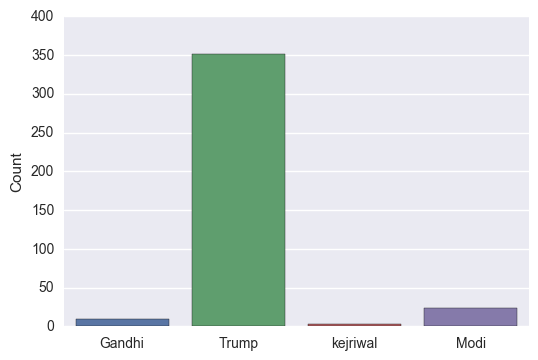

In [10]:
# Initialize list to store tweet counts
[Gandhi,Trump,Kejriwal,Modi]=[0,0,0,0]

def word_in_text(word,tweet):
    word=word.lower()
    text=tweet.lower()
    match=re.search(word,text)
    if match:
        return True
    else:
        return False

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index,row in df.iterrows():
    Gandhi += word_in_text('Gandhi',row['text'])
    Trump += word_in_text('Trump', row['text'])
    Kejriwal += word_in_text('kejriwal', row['text'])
    Modi += word_in_text('Modi', row['text'])

# Plot histogram
sns.set(color_codes=True)
sns.barplot(['Gandhi','Trump','kejriwal','Modi'],[Gandhi,Trump,Kejriwal,Modi]).set(ylabel='Count')
plt.show()

In [12]:
df['text'].head(20)

0     RT @araslanian_: Stop asking me why I don't give a fuck about trump and his supporters. This is why. You're all pieces of shit for b…           
1     RT @kyledcheney: Republicans can barely get Trump to hate-tweet at vulnerable Dems. Pelosi calls and get him to reassure Dreamers. https://…    
2     RT @TajinderBagga: Modi Follows ABC\nABC abused XYZ\nModi responsible\n\nSonia Gandhi appoints Sushil Sharma YouthCong Chief\nSharma burned his…
3     RT @MarkSimoneNY: For all the Democrats who believed Chuck Schumer really hated Pres Trump and was working against him, take a look a…          
4     Priorities! A pictures worth a 1000 words. https://t.co/hjbFdAasjf                                                                              
5     RT @aj_wiltrout: @KevinNR If I were the Democrats, I'd put a single payer  bill on his desk. It'd be fun watching Lou Dobbs defend Trump si…    
6     RT @JenniferJJacobs: Trump admin strategizing how to react to a North Korean missile lau